## Dataset Selection:
    For this assignment, we'll utilize the widely recognized Mushroom Dataset
## Task 1: Exploratory Data Analysis (EDA)
    1. Load the Mushroom dataset and perform fundamental data exploration.
    2. Utilize histograms, box plots, or density plots to understand feature distributions.
    3. Investigate feature correlations to discern relationships within the data.


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [89]:
df=pd.read_csv('mushroom.csv',index_col=0)

In [90]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [91]:
df.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

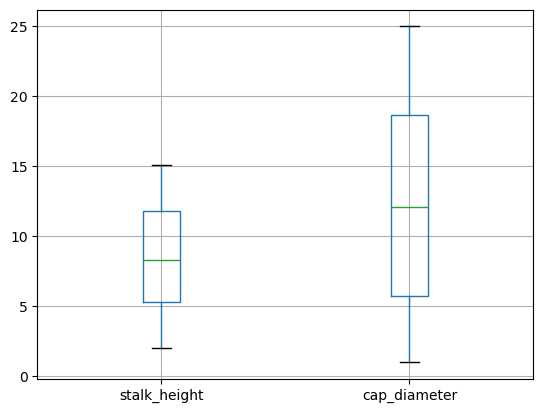

In [92]:
df.boxplot()
plt.show()

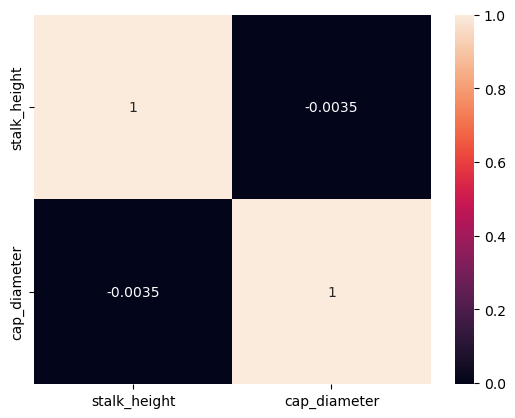

In [93]:
corr=df.select_dtypes(['int','float']).corr()
sns.heatmap(corr,annot=True)
plt.show()

## Task 2: Data Preprocessing
   1. Encode categorical variables if necessary.
   2. Split the dataset into training and testing sets.


In [97]:
from sklearn.preprocessing import OrdinalEncoder

In [98]:
One=OrdinalEncoder()

In [103]:
for col in df.select_dtypes(['object','category']).columns:
    df[[col]]=One.fit_transform(df[[col]])

In [104]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1167,4.0,2.0,7.0,0.0,1.0,1.0,2.0,0.0,7.0,1.0,...,0.0,0.0,2.0,6.0,3.0,1.0,5.0,1.0,14.276173,5.054983
1037,4.0,0.0,6.0,0.0,1.0,3.0,1.0,1.0,3.0,0.0,...,1.0,0.0,2.0,6.0,1.0,2.0,5.0,0.0,3.952715,19.068319
309,3.0,1.0,5.0,1.0,4.0,1.0,1.0,0.0,8.0,1.0,...,1.0,3.0,2.0,6.0,6.0,0.0,5.0,1.0,9.054265,7.205884
282,0.0,2.0,4.0,1.0,3.0,3.0,0.0,0.0,6.0,0.0,...,0.0,3.0,2.0,0.0,4.0,1.0,0.0,1.0,5.226499,20.932692
820,3.0,3.0,8.0,1.0,5.0,2.0,1.0,1.0,6.0,0.0,...,1.0,2.0,0.0,4.0,8.0,1.0,4.0,1.0,14.037532,12.545245


In [107]:
df.duplicated().sum()

np.int64(0)

In [106]:
df.drop_duplicates(inplace=True)

In [108]:
from sklearn.model_selection import train_test_split,GridSearchCV
feature=df.drop(columns=['class'])
target=df[['class']]

In [109]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.80,random_state=1000)

In [110]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(780, 24)
(780, 1)
(196, 24)
(196, 1)


## Task 3: Data Visualization
    1.Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
    2.Visualize class distributions to gauge dataset balance or imbalance.


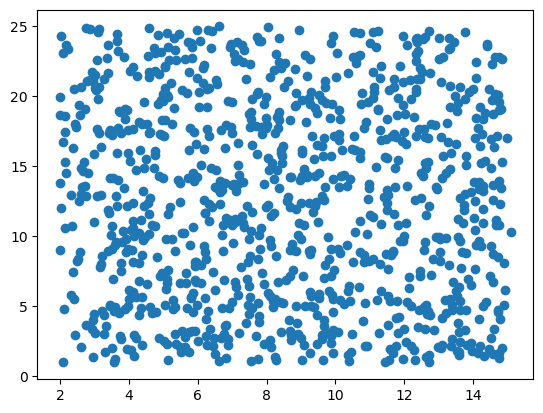

In [111]:
plt.scatter(df['stalk_height'],df['cap_diameter'])
plt.show()

## Task 4: SVM Implementation
    1.Implement a basic SVM classifier using Python libraries like scikit-learn.
    2.Train the SVM model on the training data.
    3.Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [112]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix
svc=SVC()

In [113]:
svc.fit(x_train,y_train)

SVC()

In [114]:
y_pred= svc.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Precision Score",precision_score(y_test,y_pred))
print("F1 Score",f1_score(y_test,y_pred))

Accuracy Score: 0.6581632653061225
Precision Score 0.6581632653061225
F1 Score 0.7938461538461539


## Task 5: Visualization of SVM Results
      1.Visualize classification results on the testing data.


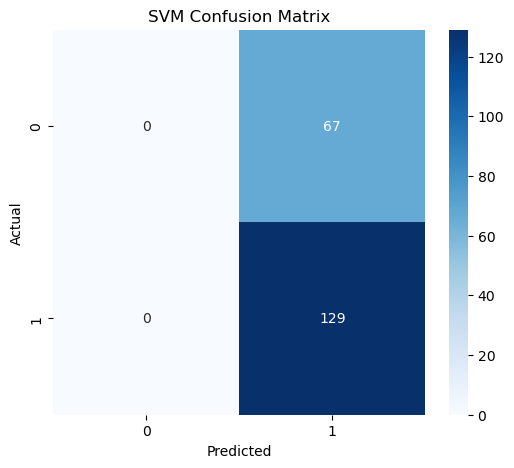

In [115]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()


## Task 6: Parameter Tuning and Optimization
    1.Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [119]:
svc_linear=SVC(kernel='linear',gamma=0.5)

In [120]:
svc_linear.fit(x_train,y_train)

SVC(gamma=0.5, kernel='linear')

In [121]:
y_pred=svc_linear.predict(x_test)
accuracy_score(y_test,y_pred)

0.6581632653061225

In [125]:
svc_sig=SVC(kernel='sigmoid',gamma=0.5)

In [126]:
svc_sig.fit(x_train,y_train)

SVC(gamma=0.5, kernel='sigmoid')

In [127]:
y_pred=svc_sig.predict(x_test)
accuracy_score(y_test,y_pred)

0.6581632653061225

## Task 7: Comparison and Analysis
     1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
     2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
     3.	Discuss practical implications of SVM in real-world classification tasks.


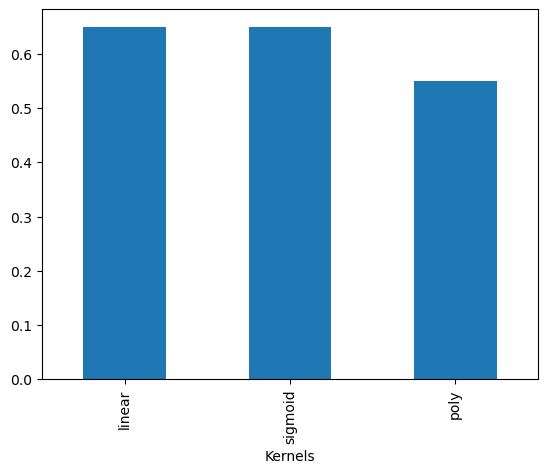

In [133]:
pd.Series([0.65,0.65,0.55],index=['linear','sigmoid','poly']).plot(kind='bar')
plt.show()